# Load dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.metrics import (recall_score,accuracy_score, 
precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
import pickle, warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import seaborn as sb

# Load dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
y=df['Liked'].values

In [9]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# clean data

In [10]:
def clean(x):
    #to remove html tag
    x = re.sub(r'<.*?>',' ',x)
    x= re.sub(r"can't",'can not',x)
    x= re.sub(r"don't",'do not',x)
    x= re.sub(r"didn't",'did not',x)
    #change to mobile number
    x= re.sub(r'[\d-]{10,12}','mobno',x)
    #to remove punctuatin and numbers
    x = re.sub(r'[^A-Za-z]',' ',x)
    #to replace more than 1 space with 1 space
    x = re.sub(r'\s+',' ',x)
    #to convert into lower
    return x.lower()

clean("<h1>Hello there 9876576767 8787878787 I can't 9 eat this &^%H@#$%</h1>")

' hello there mobno mobno i can not eat this h '

In [11]:
df['Review'] = df.Review.apply(clean)

In [12]:
df.head(10)

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
5,now i am getting angry and i want my damn pho,0
6,honeslty it did not taste that fresh,0
7,the potatoes were like rubber and you could te...,0
8,the fries were great too,1
9,a great touch,1


# Split Data


In [13]:
df.Liked.value_counts()
print(df.shape)

(1000, 2)


In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(df['Review'].values,df['Liked'].values,
                                            test_size=.20, random_state=10)

In [15]:
print(xtrain.shape, xtest.shape, )

(800,) (200,)


# Count Vectorizer

In [16]:
cv = CountVectorizer()
cv.fit(xtrain)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
cv.get_feature_names()
print(len(cv.get_feature_names()))
cv_train = cv.transform(xtrain).toarray()
cv_test = cv.transform(xtest)
print(cv_train.shape)
print(cv_test.shape)

1763
(800, 1763)
(200, 1763)


In [18]:
cv_train[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Train Model

In [19]:
nb = MultinomialNB(alpha=1)
lg = LogisticRegression()

In [20]:
nb.fit(cv_train,ytrain)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [21]:
nb.fit(cv_train,ytrain)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [22]:
lg.fit(cv_train,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction

In [23]:
lg_pred = lg.predict(cv_test)
nb_pred = nb.predict(cv_test)

# Confusion Matrix

In [25]:
#from sklearn import metrics
import itertools
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Review')
    plt.xlabel('Liked')

# Evaluation
**1:Logistic Regression**

In [26]:
print("Logistic Regression")
print("Training Score: ",lg.score(cv_train,ytrain))
print("Testing Score: ",lg.score(cv_test,ytest))
print()
print("Confusion Matrix")
print(confusion_matrix(ytest,lg_pred))
print(precision_score(ytest, lg_pred))
print(recall_score(ytest, lg_pred))
print('\nAccuracy:',str(accuracy_score(ytest, lg_pred)*100) + '%')

Logistic Regression
Training Score:  0.98625
Testing Score:  0.825

Confusion Matrix
[[83 17]
 [18 82]]
0.8282828282828283
0.82

Accuracy: 82.5%


Confusion matrix, without normalization


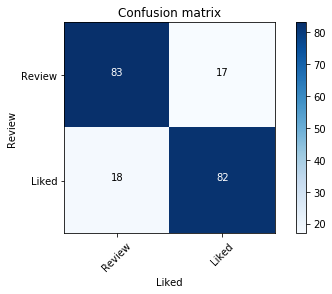

In [27]:
cm = metrics.confusion_matrix(ytest, lg_pred)
plot_confusion_matrix(cm, classes=['Review', 'Liked'])

**2:RandomForestClassifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(xtrain, ytrain)
prediction = model.predict(xtest)
print("Accuracy: {}%".format(round(accuracy_score(ytest, prediction)*100,2)))


Accuracy: 75.0%


Confusion matrix, without normalization


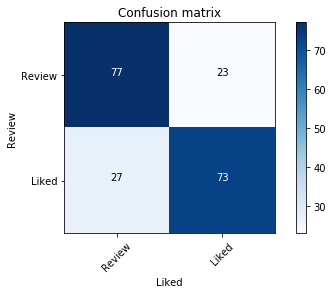

In [33]:
cm = metrics.confusion_matrix(ytest,prediction)
plot_confusion_matrix(cm, classes=['Review', 'Liked'])

**3:Naive Bayes Algorithm**

In [34]:
#accuracy find by naive bayes algorithm
print("Naive Bayes")
print("Training Score: ",nb.score(cv_train,ytrain))
print("Testing Score: ",nb.score(cv_test,ytest))
print("Confusion Matrix")
print(confusion_matrix(ytest,nb_pred))
print('\nAccuracy:',str(accuracy_score(ytest,nb_pred)*100) +'%')

Naive Bayes
Training Score:  0.95625
Testing Score:  0.795
Confusion Matrix
[[85 15]
 [26 74]]

Accuracy: 79.5%


Confusion matrix, without normalization


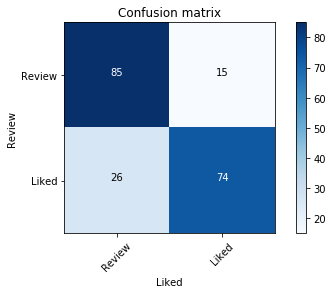

In [35]:
cm = metrics.confusion_matrix(ytest,nb_pred)
plot_confusion_matrix(cm, classes=['Review', 'Liked'])

# Visualization

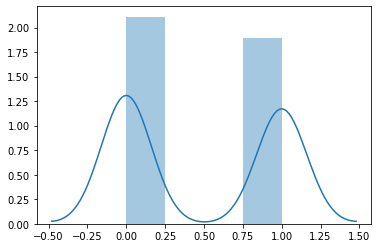

In [37]:
warnings.filterwarnings("ignore")
sb.distplot((ytest,nb_pred))

# Check

In [38]:
r = np.array(["Worst Experience ever","I must say it fabulus","Horrible! Don't ever visit again",
             "I hate this","I love this food","amazing food"])
cvr = cv.transform(r)
print(cvr.shape)
naive=nb.predict(cvr)
logistic=lg.predict(cvr)
mydf = pd.DataFrame({"Comment":r,"Naive Prediction":naive,"Logistic's Prediction":logistic})
mydf

(6, 1763)


,Comment,Naive Prediction,Logistic's Prediction
0,Worst Experience ever,0,0
1,I must say it fabulus,0,1
2,Horrible! Don't ever visit again,0,0
3,I hate this,0,0
4,I love this food,1,1
5,amazing food,1,1
